# Transposition, a bio-inspired operator - Statistics and Plot

In this notebook we analyse both visually and statistically the results obtained from `data_gen.ipynb`

In [1]:
from evol_algorithm import *
from statistics import *
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# parameters for plots
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

---
---
---

## RASTRIGIN DIMENSION 12

## Statistics

In [2]:
fs3_bea = get_data('Results/Rastrigin/D12/rastrigin_transposition_3_bea.dat')
fs6_bea = get_data('Results/Rastrigin/D12/rastrigin_transposition_6_bea.dat')
fs9_bea = get_data('Results/Rastrigin/D12/rastrigin_transposition_9_bea.dat')
fs12_bea = get_data('Results/Rastrigin/D12/rastrigin_transposition_12_bea.dat')
fs15_bea = get_data('Results/Rastrigin/D12/rastrigin_transposition_15_bea.dat')
fs18_bea = get_data('Results/Rastrigin/D12/rastrigin_transposition_18_bea.dat')

"""Shapiro-Wilk"""
sw3 = test_normal_sw(fs3_bea)
sw6 = test_normal_sw(fs6_bea)
sw9 = test_normal_sw(fs9_bea)
sw12 = test_normal_sw(fs12_bea)
sw15 = test_normal_sw(fs15_bea)
sw18 = test_normal_sw(fs18_bea)


"""Kolgomorov-Smirnov"""
ks3 = test_normal_ks(fs3_bea)
ks6 = test_normal_ks(fs6_bea)
ks9 = test_normal_ks(fs9_bea)
ks12 = test_normal_ks(fs12_bea)
ks15 = test_normal_ks(fs15_bea)
ks18 = test_normal_ks(fs18_bea)

"""Levene"""
lev = levene((fs3_bea, fs6_bea, fs9_bea, fs12_bea, fs15_bea, fs18_bea))

print('Shapiro-Wilk Test:\n\nFS3:\t%s\nFS6:\t%s\nFS9:\t%s\nFS12:\t%s\nFS15:\t%s\nFS18:\t%s' % (sw3[1], sw6[1], sw9[1], sw12[1], sw15[1], sw18[1]))
print('\nLevene Test: %s' % (lev[1]))

Shapiro-Wilk Test:

FS3:	7.766377818629877e-12
FS6:	8.587105852775334e-12
FS9:	7.848418963340986e-12
FS12:	1.0788290865093586e-06
FS15:	8.708299787940632e-07
FS18:	5.987064177759294e-10

Levene Test: 3.078203095290088e-16


$$p_{value} < 0.05$$
We choose a non-parametric test.

### Friedman ANOVA

In [3]:
test = friedman_chi((fs3_bea, fs6_bea, fs9_bea, fs12_bea, fs15_bea, fs18_bea))
print('p-value: ', test[1])

p-value:  3.253294388381572e-23


## Plots

This plot show the distributions of the **best at the end** for different value of the flanking size parameter.

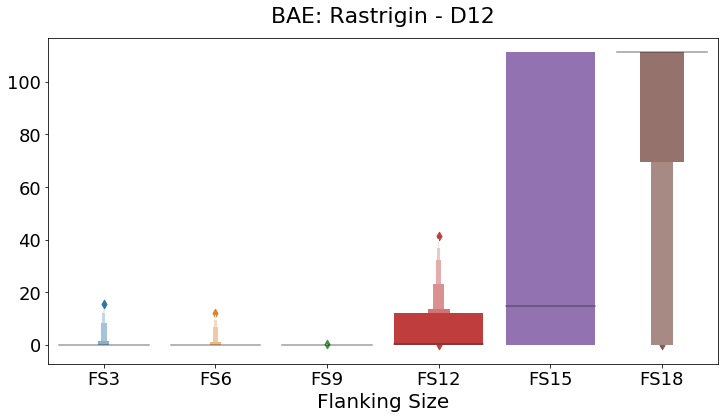

In [4]:
mpl.rcParams['figure.figsize'] = (12, 6)
df = pd.DataFrame({'FS3':fs3_bea, 'FS6':fs6_bea, 'FS9':fs9_bea, 'FS12':fs12_bea, 'FS15':fs15_bea, 'FS18':fs18_bea})

ax = sns.boxenplot(data=df)
ax.set_title('BAE: Rastrigin - D12', pad=15)
ax.set_xlabel('Flanking Size')

plt.savefig('Figure/box_rastrigin_D12.pdf', dpi=400)

We show the behavior of the fitness over generation for the FS value that are more promising.

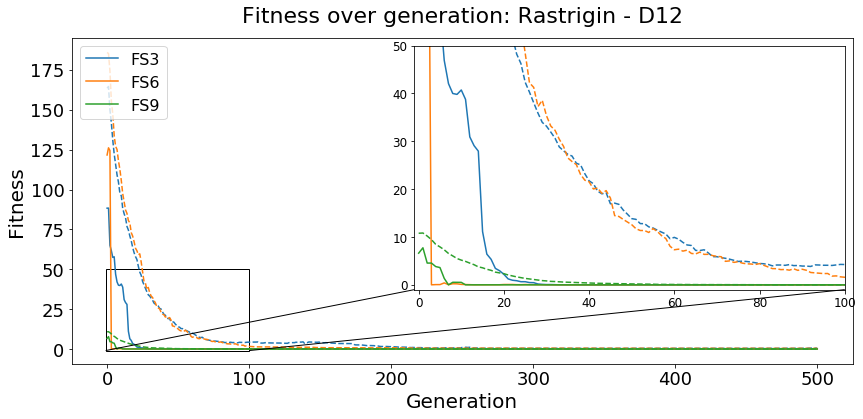

In [5]:
fs3 = get_data('Results/Rastrigin/D12/rastrigin_transposition_3.dat')
fs6 = get_data('Results/Rastrigin/D12/rastrigin_transposition_6.dat')
fs9 = get_data('Results/Rastrigin/D12/rastrigin_transposition_9.dat')

fig, ax = plt.subplots(figsize=(14,6))
axins = zoomed_inset_axes(ax, zoom=3, loc=1)


ax.plot(fs3[0], label='FS3', c='tab:blue')
ax.plot(fs3[1], c='tab:blue', linestyle='dashed')
axins.plot(fs3[0], label='FS3', c='tab:blue')
axins.plot(fs3[1], c='tab:blue', linestyle='dashed')

ax.plot(fs6[0], label='FS6', c='tab:orange')
ax.plot(fs6[1], c='tab:orange', linestyle='dashed')
axins.plot(fs6[0], label='FS6', c='tab:orange')
axins.plot(fs6[1], c='tab:orange', linestyle='dashed')

ax.plot(fs9[0], label='FS9', c='tab:green')
ax.plot(fs9[1], c='tab:green', linestyle='dashed')
axins.plot(fs9[0], label='FS9', c='tab:green')
axins.plot(fs9[1], c='tab:green', linestyle='dashed')

# zoom

x1, x2, y1, y2 = -1, 100, -1, 50
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both', labelsize=12)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness over generation: Rastrigin - D12', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend(loc='upper left', fontsize=16)

plt.savefig('Figure/fitness_rastrigin_D12.pdf', dpi=400)

We can also compare the distribution of the BAE statistically. The test used is the non parametric **Wilcoxon** test.

In [6]:
test = wilcoxon(fs3_bea, fs6_bea)
print('FS 3 e 6 p-value: ', test[1])

test = wilcoxon(fs3_bea, fs9_bea)
print('FS 3 e 9 p-value: ', test[1])

test = wilcoxon(fs9_bea, fs6_bea)
print('FS 6 e 9 p-value: ', test[1])

FS 3 e 6 p-value:  0.003256361508313623
FS 3 e 9 p-value:  1.0
FS 6 e 9 p-value:  0.003281477916364575


/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


The following plot shows the distribution of the results obtained with crossover operator and different value of the population size.

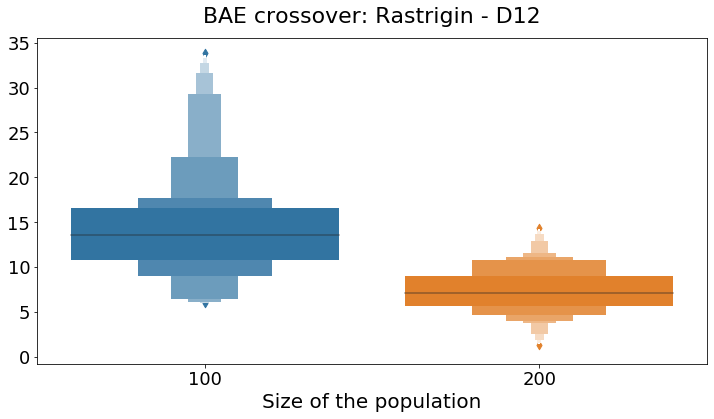

In [7]:
mpl.rcParams['figure.figsize'] = (12, 6)

pop100 = get_data('Results/Rastrigin/D12/rastrigin_crossover_bea.dat')
pop200 = get_data('Results/Rastrigin/D12/rastrigin_crossover_bea_200pop.dat')

#df = pd.DataFrame({'fs3':fs3, 'fs6':fs6, 'fs9':fs9, 'fs12':fs12, 'fs15':fs15, 'fs18':fs18})
df_cross = pd.DataFrame({'100':pop100, '200':pop200})
ax = sns.boxenplot(data=df_cross)

ax.set_title('BAE crossover: Rastrigin - D12', pad=15)
ax.set_xlabel('Size of the population')

plt.savefig('Figure/box_rastrigin_crossover_D12.pdf', dpi=400)

Eventually we show the comparison between the results achived with the two differen operators.

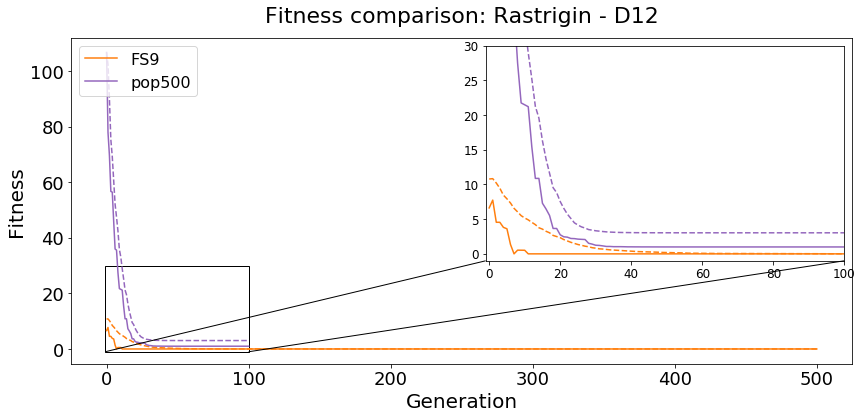

In [10]:
pop100 = get_data('Results/Rastrigin/D12/rastrigin_crossover.dat')
pop200 = get_data('Results/Rastrigin/D12/rastrigin_crossover_200pop.dat')
pop500 = get_data('Results/Rastrigin/D12/rastrigin_crossover_D12_pop500.dat')

fig, ax = plt.subplots(figsize=(14,6))
axins = zoomed_inset_axes(ax, zoom=2.5, loc=1)

ax.plot(fs9[0], label='FS9', c='tab:orange')
ax.plot(fs9[1], c='tab:orange', linestyle='dashed')
axins.plot(fs9[0], label='FS9', c='tab:orange')
axins.plot(fs9[1], c='tab:orange', linestyle='dashed')

'''
ax.plot(pop100[0], label='pop100', c='tab:red')
ax.plot(pop100[1], c='tab:red', linestyle='dashed')
axins.plot(pop100[0], label='pop100', c='tab:red')
axins.plot(pop100[1], c='tab:red', linestyle='dashed')

ax.plot(pop200[0], label='pop200', c='tab:green')
ax.plot(pop200[1], c='tab:green', linestyle='dashed')
axins.plot(pop200[0], label='pop200', c='tab:green')
axins.plot(pop200[1], c='tab:green', linestyle='dashed')
'''


ax.plot(pop500[0], label='pop500', c='tab:purple')
ax.plot(pop500[1], c='tab:purple', linestyle='dashed')
axins.plot(pop500[0], label='pop500', c='tab:purple')
axins.plot(pop500[1], c='tab:purple', linestyle='dashed')


# zoom

x1, x2, y1, y2 = -1, 100, -1, 30
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both', labelsize=12)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness comparison: Rastrigin - D12', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend(loc='upper left', fontsize=16)

plt.savefig('Figure/fitness_rastrigin_confrontation_D12.pdf', dpi=400)
#plt.xlim(0,500)
#plt.ylim(0,10)

## RASTRIGIN DIMENSION 20

We repeat the same study for the case of Rastrigin function in dimension equal to 20.

## Statistics

In [9]:
fs3_bea = get_data('Results/Rastrigin/D20/rastrigin_transposition_3_D20_bea.dat')
fs6_bea = get_data('Results/Rastrigin/D20/rastrigin_transposition_6_D20_bea.dat')
fs9_bea = get_data('Results/Rastrigin/D20/rastrigin_transposition_9_D20_bea.dat')
fs12_bea = get_data('Results/Rastrigin/D20/rastrigin_transposition_12_D20_bea.dat')
fs15_bea = get_data('Results/Rastrigin/D20/rastrigin_transposition_15_D20_bea.dat')

"""Shapiro-Wilk"""
sw3 = test_normal_sw(fs3_bea)
sw6 = test_normal_sw(fs6_bea)
sw9 = test_normal_sw(fs9_bea)
sw12 = test_normal_sw(fs12_bea)
sw15 = test_normal_sw(fs15_bea)

"""Kolgomorov-Smirnov"""
ks3 = test_normal_ks(fs3_bea)
ks6 = test_normal_ks(fs6_bea)
ks9 = test_normal_ks(fs9_bea)
ks12 = test_normal_ks(fs12_bea)
ks15 = test_normal_ks(fs15_bea)
"""Levene"""
lev = levene((fs3_bea, fs6_bea, fs9_bea, fs12_bea, fs15_bea))

print('Shapiro-Wilk Test:\n\nFS3:\t%s\nFS6:\t%s\nFS9:\t%s\nFS12:\t%s\nFS15:\t%s' % (sw3[1], sw6[1], sw9[1], sw12[1], sw15[1]))
print('\nLevene Test: %s' % (lev[1]))

Shapiro-Wilk Test:

FS3:	1.762926749027116e-10
FS6:	5.453869023064328e-10
FS9:	5.364429398468928e-07
FS12:	8.057823741580705e-09
FS15:	4.725508873093531e-10

Levene Test: 0.07660808213194838


We choose a non-parametric test

## Friedman ANOVA

In [10]:
test = friedman_chi((fs3_bea, fs6_bea, fs9_bea, fs12_bea, fs15_bea))
print('p-value: ', test[1])

p-value:  4.8130356956262526e-14


## Plots

**BAE**

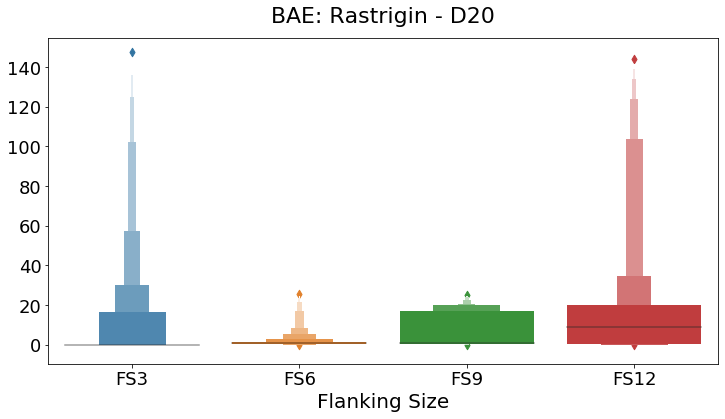

In [11]:
mpl.rcParams['figure.figsize'] = (12, 6)
df = pd.DataFrame({'FS3':fs3_bea, 'FS6':fs6_bea, 'FS9':fs9_bea, 'FS12':fs12_bea})

ax = sns.boxenplot(data=df)
ax.set_title('BAE: Rastrigin - D20', pad=15)
ax.set_xlabel('Flanking Size')

plt.savefig('Figure/box_rastrigin_D20.pdf', dpi=400)

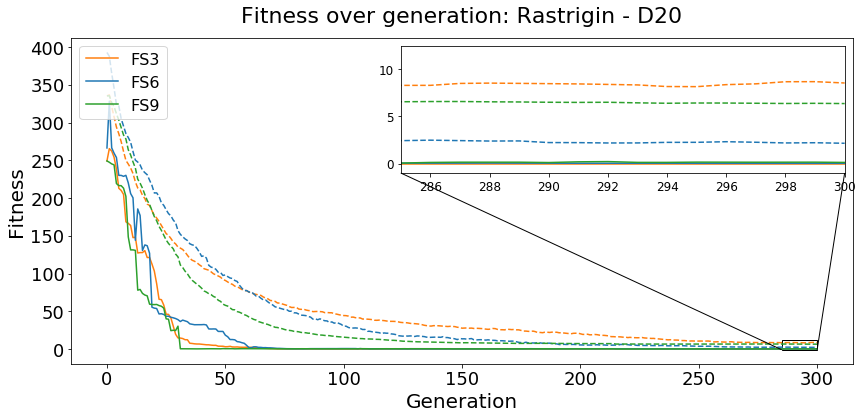

In [12]:
fs3 = get_data('Results/Rastrigin/D20/rastrigin_transposition_3_D20.dat')
fs6 = get_data('Results/Rastrigin/D20/rastrigin_transposition_6_D20.dat')
fs9 = get_data('Results/Rastrigin/D20/rastrigin_transposition_9_D20.dat')
fs12 = get_data('Results/Rastrigin/D20/rastrigin_transposition_12_D20.dat')
fs15 = get_data('Results/Rastrigin/D20/rastrigin_transposition_15_D20.dat')

fig, ax = plt.subplots(figsize=(14,6))
axins = zoomed_inset_axes(ax, zoom=12.5, loc=1)


ax.plot(fs3[0], label='FS3', c='tab:orange')
ax.plot(fs3[1], c='tab:orange', linestyle='dashed')
axins.plot(fs3[0], label='FS3', c='tab:orange')
axins.plot(fs3[1], c='tab:orange', linestyle='dashed')

ax.plot(fs6[0], label='FS6', c='tab:blue')
ax.plot(fs6[1], c='tab:blue', linestyle='dashed')
axins.plot(fs6[0], label='FS6', c='tab:blue')
axins.plot(fs6[1], c='tab:blue', linestyle='dashed')

ax.plot(fs9[0], label='FS9', c='tab:green')
ax.plot(fs9[1], c='tab:green', linestyle='dashed')
axins.plot(fs9[0], label='FS9', c='tab:green')
axins.plot(fs9[1], c='tab:green', linestyle='dashed')

# zoom

x1, x2, y1, y2 = 285, 300, -1, 12.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both', labelsize=12)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness over generation: Rastrigin - D20', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend(loc='upper left', fontsize=16)

plt.savefig('Figure/fitness_rastrigin_D20.pdf', dpi=400)
#plt.xlim(0,500)
#plt.ylim(0,10)

In [13]:
#Wilcoxon parametric test for the possible pairs.

test = wilcoxon(fs3_bea, fs6_bea)
print('FS 3 and 6 p-value: ', test[1])

test = wilcoxon(fs3_bea, fs9_bea)
print('FS 3 and 9 p-value: ', test[1])

test = wilcoxon(fs9_bea, fs6_bea)
print('FS 6 and 9 p-value: ', test[1])

FS 3 and 6 p-value:  0.051930665029697155
FS 3 and 9 p-value:  0.02702915661831454
FS 6 and 9 p-value:  0.13590778549641166


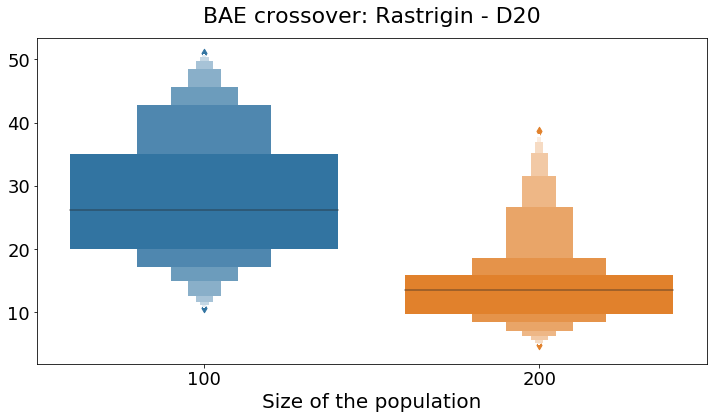

In [14]:
mpl.rcParams['figure.figsize'] = (12, 6)

pop100 = get_data('Results/Rastrigin/D20/rastrigin_crossover_D20_bea_pop100.dat')
pop200 = get_data('Results/Rastrigin/D20/rastrigin_crossover_D20_bea_pop200.dat')

#df = pd.DataFrame({'fs3':fs3, 'fs6':fs6, 'fs9':fs9, 'fs12':fs12, 'fs15':fs15, 'fs18':fs18})
df_cross = pd.DataFrame({'100':pop100, '200':pop200})
ax = sns.boxenplot(data=df_cross)

ax.set_title('BAE crossover: Rastrigin - D20', pad=15)
ax.set_xlabel('Size of the population')


plt.savefig('Figure/box_rastrigin_crossover_D20.pdf', dpi=400)

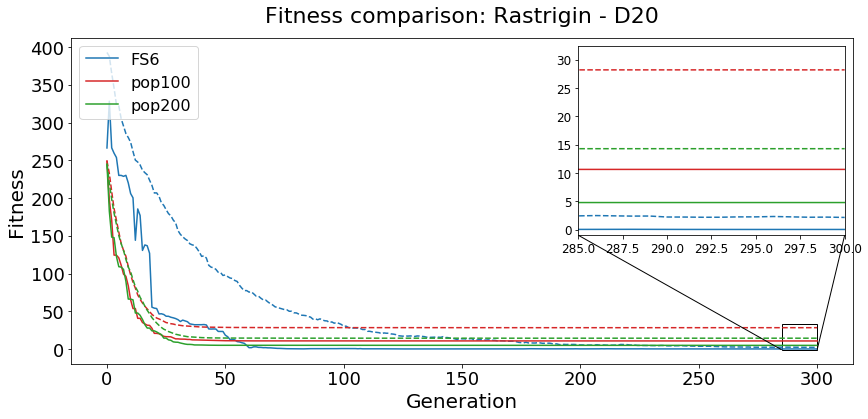

In [15]:
pop100 = get_data('Results/Rastrigin/D20/rastrigin_crossover_D20_pop100.dat')
pop200 = get_data('Results/Rastrigin/D20/rastrigin_crossover_D20_pop200.dat')

fig, ax = plt.subplots(figsize=(14,6))
axins = zoomed_inset_axes(ax, zoom=7.5, loc=1)

ax.plot(fs6[0], label='FS6', c='tab:blue')
ax.plot(fs6[1], c='tab:blue', linestyle='dashed')
axins.plot(fs6[0], label='FS6', c='tab:blue')
axins.plot(fs6[1], c='tab:blue', linestyle='dashed')


ax.plot(pop100[0], label='pop100', c='tab:red')
ax.plot(pop100[1], c='tab:red', linestyle='dashed')
axins.plot(pop100[0], label='pop100', c='tab:red')
axins.plot(pop100[1], c='tab:red', linestyle='dashed')

ax.plot(pop200[0], label='pop200', c='tab:green')
ax.plot(pop200[1], c='tab:green', linestyle='dashed')
axins.plot(pop200[0], label='pop200', c='tab:green')
axins.plot(pop200[1], c='tab:green', linestyle='dashed')

# zoom

x1, x2, y1, y2 = 285, 300, -1, 32.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both', labelsize=12)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness comparison: Rastrigin - D20', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend(loc='upper left', fontsize=16)

plt.savefig('Figure/fitness_rastrigin_confrontation_D20.pdf', dpi=400)
#plt.xlim(0,500)
#plt.ylim(0,10)

---

---

---

## SCHWEFEL DIMENSION 15

We repeat the same study for the case of Schwefel function in dimension equal to 15.

## Statistics

In [16]:
fs3_bea = get_data('Results/Schwefel/schwefel_transposition_3_D15_bea.dat')
fs6_bea = get_data('Results/Schwefel/schwefel_transposition_6_D15_bea.dat')
fs9_bea = get_data('Results/Schwefel/schwefel_transposition_9_D15_bea.dat')
fs12_bea = get_data('Results/Schwefel/schwefel_transposition_12_D15_bea.dat')
fs15_bea = get_data('Results/Schwefel/schwefel_transposition_15_D15_bea.dat')

"""Shapiro-Wilk"""
sw3 = test_normal_sw(fs3_bea)
sw6 = test_normal_sw(fs6_bea)
sw9 = test_normal_sw(fs9_bea)
sw12 = test_normal_sw(fs12_bea)
sw15 = test_normal_sw(fs15_bea)


"""Kolgomorov-Smirnov"""
ks3 = test_normal_ks(fs3_bea)
ks6 = test_normal_ks(fs6_bea)
ks9 = test_normal_ks(fs9_bea)
ks12 = test_normal_ks(fs12_bea)
ks15 = test_normal_ks(fs15_bea)

"""Levene"""
lev = levene((fs3_bea, fs6_bea, fs9_bea, fs12_bea, fs15_bea))

print('Shapiro-Wilk Test:\n\nFS3:\t%s\nFS6:\t%s\nFS9:\t%s\nFS12:\t%s\nFS15:\t%s' % (sw3[1], sw6[1], sw9[1], sw12[1], sw15[1]))
print('\nLevene Test: %s' % (lev[1]))

Shapiro-Wilk Test:

FS3:	0.00020568761101458222
FS6:	3.4100569337169873e-06
FS9:	2.1825208307291177e-09
FS12:	5.2212269230356156e-11
FS15:	1.2819507901440375e-05

Levene Test: 2.5121205531091533e-10


$$p_{value} < 0.05$$
We choose a non-parametric test

## Friedman ANOVA

In [17]:
test = friedman_chi((fs3_bea, fs6_bea, fs9_bea, fs12_bea, fs15_bea))
print('p-value: ', test[1])

p-value:  5.105142138106372e-08


## Plots

**BAE**

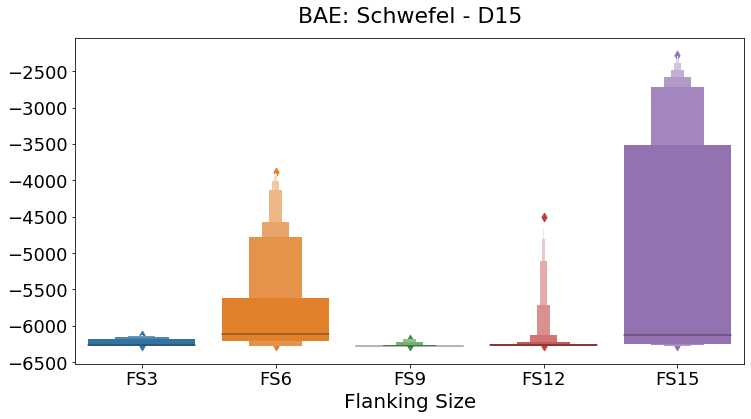

In [18]:
mpl.rcParams['figure.figsize'] = (12, 6)
df = pd.DataFrame({'FS3':fs3_bea, 'FS6':fs6_bea, 'FS9':fs9_bea, 'FS12':fs12_bea, 'FS15':fs15_bea})

ax = sns.boxenplot(data=df)
ax.set_title('BAE: Schwefel - D15', pad=15)
ax.set_xlabel('Flanking Size')

plt.savefig('Figure/box_schwefel_D15.pdf', dpi=400)

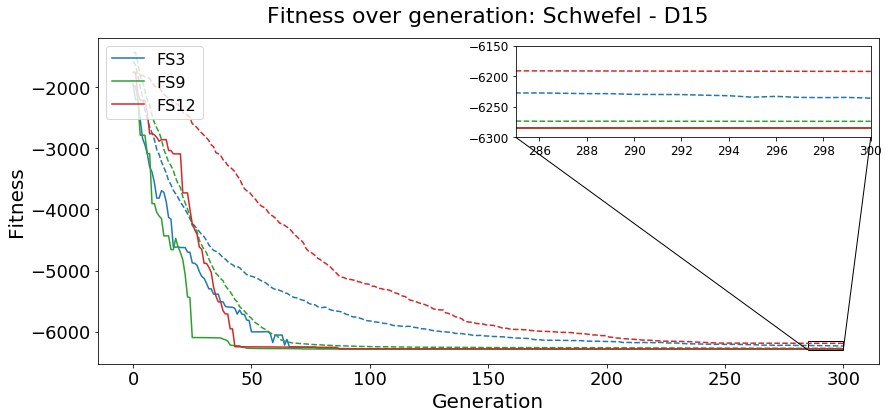

In [19]:
fs3 = get_data('Results/Schwefel/schwefel_transposition_3_D15.dat')
fs6 = get_data('Results/Schwefel/schwefel_transposition_6_D15.dat')
fs9 = get_data('Results/Schwefel/schwefel_transposition_9_D15.dat')
fs12 = get_data('Results/Schwefel/schwefel_transposition_12_D15.dat')
fs15 = get_data('Results/Schwefel/schwefel_transposition_15_D15.dat')

fig, ax = plt.subplots(figsize=(14,6))
axins = zoomed_inset_axes(ax, zoom=10, loc=1)

ax.plot(fs3[0], label='FS3', c='tab:blue')
ax.plot(fs3[1], c='tab:blue', linestyle='dashed')
axins.plot(fs3[0], label='FS3', c='tab:blue')
axins.plot(fs3[1], c='tab:blue', linestyle='dashed')

'''
ax.plot(fs6[0], label='FS6', c='tab:orange')
ax.plot(fs6[1], c='tab:orange', linestyle='dashed')
axins.plot(fs6[0], label='FS6', c='tab:orange')
axins.plot(fs6[1], c='tab:orange', linestyle='dashed')
'''

ax.plot(fs9[0], label='FS9', c='tab:green')
ax.plot(fs9[1], c='tab:green', linestyle='dashed')
axins.plot(fs9[0], label='FS9', c='tab:green')
axins.plot(fs9[1], c='tab:green', linestyle='dashed')

ax.plot(fs12[0], label='FS12', c='tab:red')
ax.plot(fs12[1], c='tab:red', linestyle='dashed')
axins.plot(fs12[0], label='FS12', c='tab:red')
axins.plot(fs12[1], c='tab:red', linestyle='dashed')

# zoom

x1, x2, y1, y2 = 285, 300, -6300, -6150
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both', labelsize=12)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness over generation: Schwefel - D15', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend(loc='upper left', fontsize=16)

plt.savefig('Figure/fitness_schwefel_D15.pdf', dpi=400)
#plt.xlim(0,500)
#plt.ylim(0,10)

In [20]:
#Wilcoxon parametric test for the possible pairs.

test = wilcoxon(fs3_bea, fs12_bea)
print('FS 3 and 12 p-value: ', test[1])

test = wilcoxon(fs3_bea, fs9_bea)
print('FS 3 and 9 p-value: ', test[1])

test = wilcoxon(fs9_bea, fs12_bea)
print('FS 12 and 9 p-value: ', test[1])

FS 3 and 12 p-value:  0.3933343721992797
FS 3 and 9 p-value:  0.002957462130717483
FS 12 and 9 p-value:  0.016565526979430395


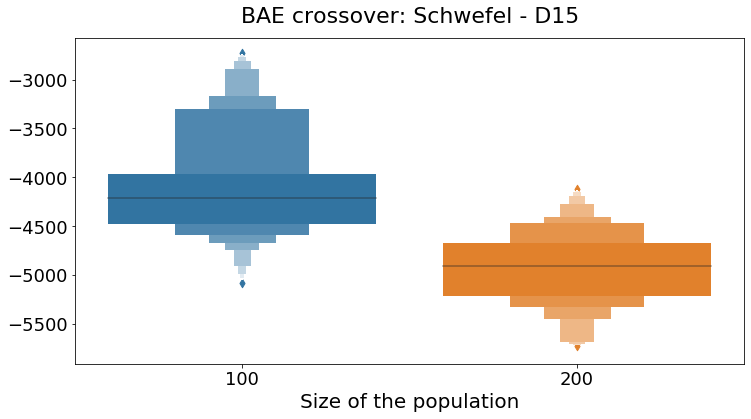

In [21]:
mpl.rcParams['figure.figsize'] = (12, 6)

pop100 = get_data('Results/Schwefel/schwefel_crossover_D15_pop100_bea.dat')
pop200 = get_data('Results/Schwefel/schwefel_crossover_D15_pop200_bea.dat')

df_cross = pd.DataFrame({'100':pop100, '200':pop200})
ax = sns.boxenplot(data=df_cross)

ax.set_title('BAE crossover: Schwefel - D15', pad=15)
ax.set_xlabel('Size of the population')

plt.savefig('Figure/box_schwefel_crossover_D15.pdf', dpi=400)

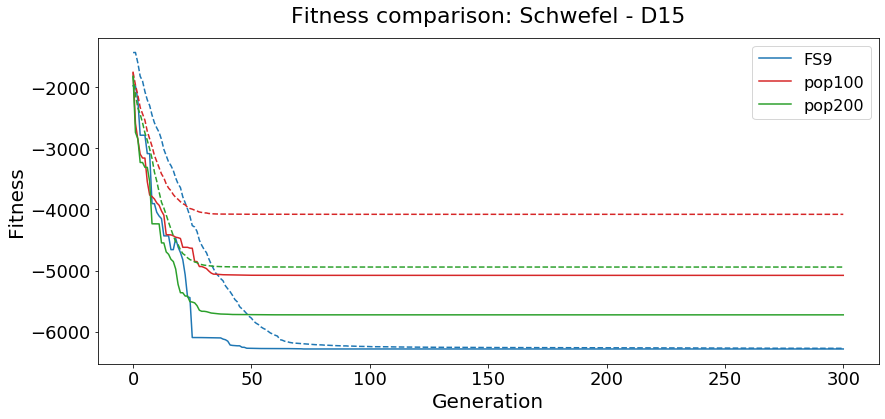

In [22]:
pop100 = get_data('Results/Schwefel/schwefel_crossover_D15_pop100.dat')
pop200 = get_data('Results/Schwefel/schwefel_crossover_D15_pop200.dat')

fig, ax = plt.subplots(figsize=(14,6))
#axins = zoomed_inset_axes(ax, zoom=7.5, loc=1)

ax.plot(fs9[0], label='FS9', c='tab:blue')
ax.plot(fs9[1], c='tab:blue', linestyle='dashed')
axins.plot(fs9[0], label='FS9', c='tab:blue')
axins.plot(fs9[1], c='tab:blue', linestyle='dashed')

ax.plot(pop100[0], label='pop100', c='tab:red')
ax.plot(pop100[1], c='tab:red', linestyle='dashed')
axins.plot(pop100[0], label='pop100', c='tab:red')
axins.plot(pop100[1], c='tab:red', linestyle='dashed')

ax.plot(pop200[0], label='pop200', c='tab:green')
ax.plot(pop200[1], c='tab:green', linestyle='dashed')
axins.plot(pop200[0], label='pop200', c='tab:green')
axins.plot(pop200[1], c='tab:green', linestyle='dashed')



# zoom

x1, x2, y1, y2 = 285, 300, -1, 32.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(axis='both', labelsize=12)
mark_inset(ax, axins, loc1=3, loc2=4);

ax.set_title('Fitness comparison: Schwefel - D15', pad=15)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')
ax.legend(loc='upper right', fontsize=16)

plt.savefig('Figure/fitness_schwefel_confrontation_D15.pdf', dpi=400)
#plt.xlim(0,500)
#plt.ylim(0,10)